In [1]:
import pandas as pd 
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('diabetes_csv.csv')
df['class'].replace(('tested_positive', 'tested_negative'), (1, 0), inplace=True) 

df.to_csv('file.csv', header=False, index=False)

In [2]:
import csv
def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [3]:
import random
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [31]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [32]:
import math
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [33]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [34]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [35]:
import math
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [36]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [37]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [38]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [39]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [40]:
filename = 'file.csv'
dataset = loadCsv(filename)
print('Loaded data file {0} with {1} rows'.format(filename, len(dataset)))

splitRatio = 0.67
train, test = splitDataset(dataset, splitRatio)
print('Split {} rows into train with {} and test with {}'.format(len(dataset), len(train), len(test)))


# prepare model
summaries = summarizeByClass(train)
# test model
predictions = getPredictions(summaries, test)
accuracy = getAccuracy(test, predictions)
print('Accuracy: ',accuracy)

Loaded data file file.csv with 768 rows
Split 768 rows into train with 514 and test with 254
Accuracy:  76.77165354330708


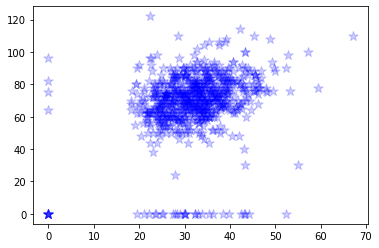

In [58]:
plt.scatter(df['mass'],df['pres'], alpha=0.2,color='b',s=100,marker='*', cmap='viridis')
